In [135]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [136]:
# 2. Đọc file csv và gắng index với giá Close
# df = pd.read_csv('../../Dataset/AAPL.csv')
# df = pd.read_csv('../../Dataset/MSFT.csv')
df = pd.read_csv('../../Dataset/GOOG.csv')
df1=df.reset_index()['Close']

In [137]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [138]:
# # 4.1 Chia train test 7 - 3
# train_size = int(0.7 * len(df1))
# test_size = len(df1) - train_size

# train_data = df1[:train_size]
# test_data = df1[train_size:]

In [139]:
# 4.2 Chia train test 8 - 2
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [140]:
# # 4.2 Chia train test 9 - 1
# train_size = int(0.9 * len(df1))
# test_size = len(df1) - train_size

# train_data = df1[:train_size]
# test_data = df1[train_size:]

In [141]:
# 5. Hàm Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [142]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [143]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [144]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\Kaito1820\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [145]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0273 - val_loss: 0.0020
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.0826e-04 - val_loss: 0.0018
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.3282e-04 - val_loss: 0.0016
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6615e-04 - val_loss: 0.0019
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2436e-04 - val_loss: 0.0017
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2405e-04 - val_loss: 0.0010
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9425e-04 - val_loss: 0.0013
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7905e-04 - val_loss: 0.0012
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.6732e-04 - val_loss: 0.0011
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0814e-04 - val_loss: 9.9544e-04
Epoch 12/100
19/19 ━━━

In [146]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [147]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [148]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MAE và MAPE
ytest_inverse = scaler.inverse_transform(ytest.reshape(-1, 1))

test_rmse = np.sqrt(np.mean((y_pred - ytest_inverse)**2))
test_mape = np.mean(np.abs((y_pred - ytest_inverse) / ytest_inverse)) * 100
test_mae = np.mean(np.abs(y_pred - ytest_inverse))

print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 2.750477380776156
Testing MAPE: 1.382821837249232
Testing MAE: 1.9962013714337208


In [149]:
# 13.1 Dự báo 90 ngày tiếp theo
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
i = 0
while(i < 90):
    if(len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, time_step, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, time_step, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

[0.9466909]
101
1 day input [0.72661007 0.72561561 0.72997583 0.7287519  0.71964907 0.73571289
 0.75850811 0.7565193  0.76393913 0.77671375 0.80188026 0.80302763
 0.81105953 0.79736714 0.71131124 0.71827224 0.72462115 0.73525383
 0.73892563 0.7486403  0.75277105 0.77571928 0.76432162 0.746269
 0.75215908 0.72768098 0.71100521 0.71437096 0.72691599 0.73823721
 0.73800762 0.68798051 0.69830727 0.67788323 0.6958594  0.68285542
 0.65317566 0.64996292 0.64063063 0.66113111 0.6691629  0.68943392
 0.69463546 0.70343236 0.7307407  0.71414149 0.76240927 0.75812561
 0.77158854 0.76439818 0.7875759  0.78283318 0.78704038 0.78887628
 0.79132404 0.82375759 0.81893842 0.82276313 0.78887628 0.80417511
 0.82100379 0.83630262 0.83263094 0.85657351 0.84433452 0.8224572
 0.81993288 0.8266644  0.83110108 0.81779105 0.83484921 0.84991856
 0.85894493 0.83484921 0.95525101 0.91096084 0.8860238  0.89313781
 0.91524462 0.91929879 0.92572427 0.94981988 0.93589801 0.93911074
 0.92924293 0.93390908 0.94178797 0.9

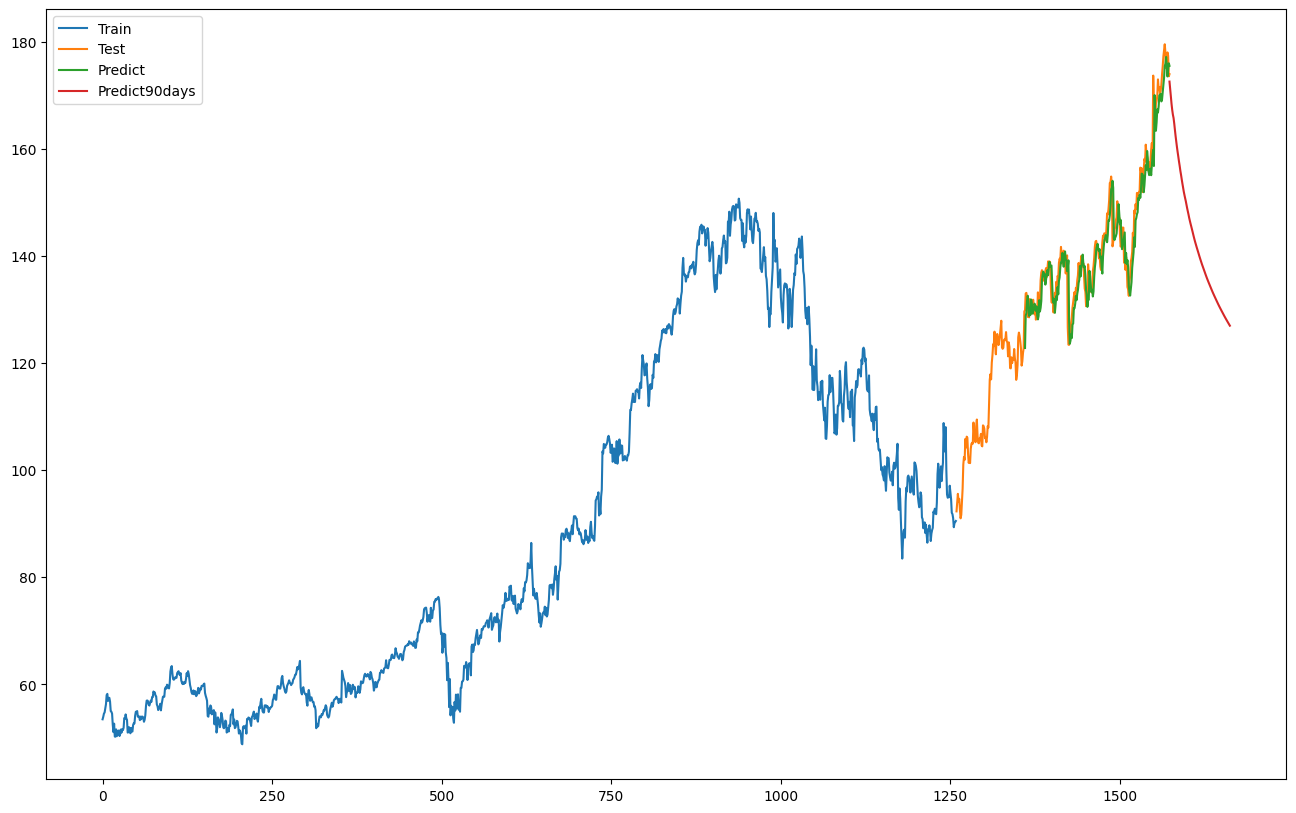

In [150]:
# Tạo index cho train_data
plt.figure(figsize=(16,10))
plt.plot(scaler.inverse_transform(train_data))
plt.plot(np.arange(train_size, train_size + test_size), scaler.inverse_transform(test_data))
plt.plot(np.arange(train_size + time_step + 1, train_size + time_step + 1 + len(y_pred)), y_pred)
plt.plot(np.arange(len(df1) - 1, len(df1) + 89), scaler.inverse_transform(lst_output))
# plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
# plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])
plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])
plt.show()
